In [1]:
#import main_module
%run main_module.ipynb

In [2]:
# # Перевод сигнала из файла .prs в рабочей директрории ASTRO в файл sig.txt
# !HardDecoder.exe "C:\HOLTWIN_mian\RWORK\DATA\c0000001.prs" sig.txt 

In [3]:
#import PyQt5 # для графиков в отдельных картинках
#%matplotlib qt  

%matplotlib inline

## Чтение и подготовка

In [4]:
tested_record = record(r"base_signals/sig_base_HE3.txt",holter_type='HE3', amplitude_convert = 330)
#tested_record = record(r"base_signals/sig_base_HE3BP.txt",holter_type='HE3BP', amplitude_convert = 330)
#tested_record = record(r"base_signals/sig_base_HE12N.txt",holter_type='HE12N', amplitude_convert = 330)
#tested_record = record(r"base_signals/sig_base_HE12BP.txt",holter_type='HE12BP', amplitude_convert = 330)

len: 425984


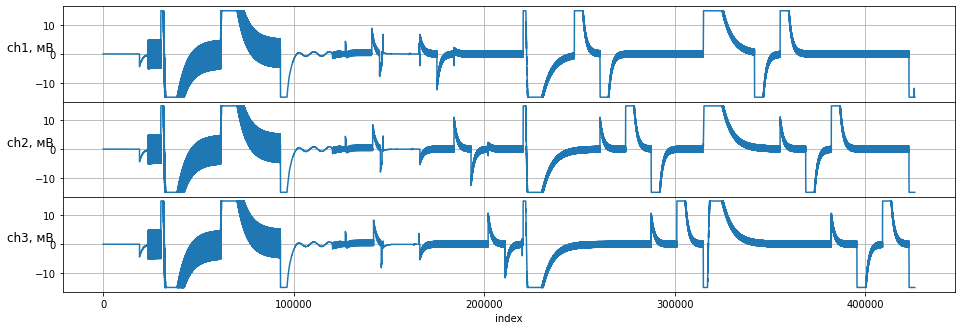

In [5]:
tested_record.plot()

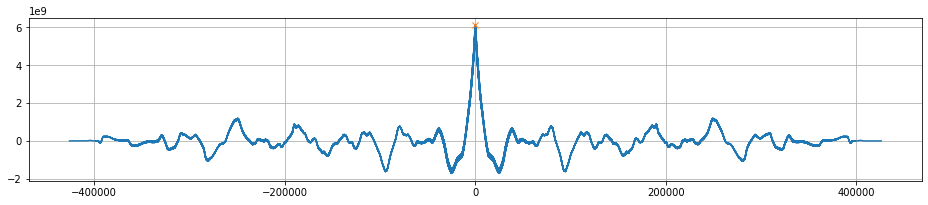

index lag: 0


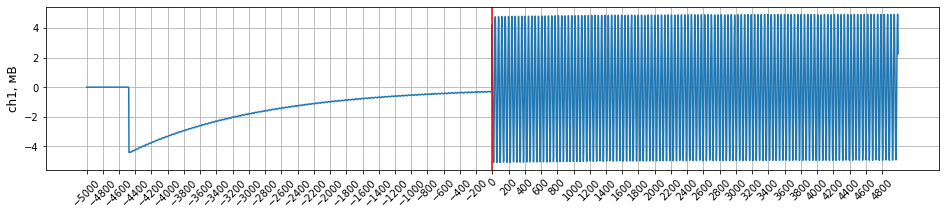

In [6]:
tested_record.find_index_lag(offset=0, plot_corr=True)
print('index lag:' ,tested_record.index_lag)
tested_record.calibrate_index_lag()
tested_record.split_channels()

Segment: 2) 10 mV
begin , end: 23557, 29500
border: 1188


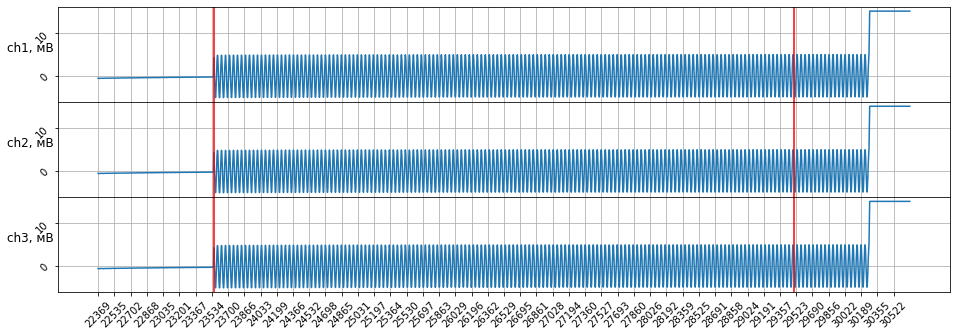

begin , end: 23557, 29500


In [7]:
# Построение участков
i_seg = 2
border = 0.2

begin = tested_record.time_limits[i_seg][1] + tested_record.index_lag
end = tested_record.time_limits[i_seg][2] + tested_record.index_lag
begin = 24037-480
print('Segment:' ,tested_record.time_limits[i_seg][0])
tested_record.find_segment_limits(begin, end, border)

## Поиск индексов

begin , end: 1061162, 1084162
border: 6900


ValueError: x and y must have same first dimension, but have shapes (36800,) and (0,)

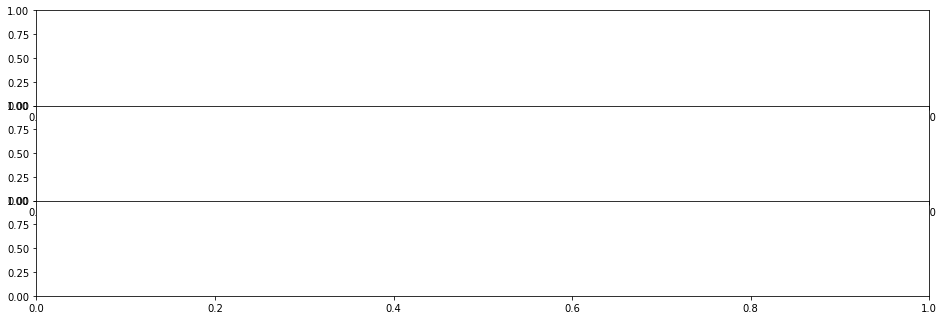

In [8]:
# поиск индексов по времени в записи через холтеровский софт

time_end = '17:30:06'
offset = 6816

time_start =  '16:47:00' # время начала записи
begin =  get_index_from_time(time_start, time_end, offset) + 700
end = begin + 23000
border = 0.3
tested_record.find_segment_limits(begin, end, border)

In [ ]:
# Построение участков по индексу
#end = 307000

end = 1080000
#begin = 1006698
#begin, end = 94594, 118294
#begin = begin + 0 
#end = end + 0


border = 0.3
tested_record.find_segment_limits(begin = begin, end = end, border = border)

In [ ]:
time_limits_HE12BP = [
            ['0) nose'            , 5854, 21000],
            ['1) 50 uV'           , 24316, 31000],
            ['2) 10 mV std'       , 31700, 38000],   
            ['3) 10 mV V1-V6'     , 39022, 44500],
    
            ['4) 10 mV +300 std'  , 49847, 121000],  
            ['5) 10 mV +300 V1-V6', 128375, 163000], 
    
            ['6) 10 mV -300 std'  , 174065, 243000], 
            ['7) 10 mV -300 V1-V6', 249439, 286000],
    
            ['8) 50 mHz std'      , 290184, 325000],
            ['9) 50 mHz V1-V6'    , 330087, 353000],
    
            ['10) 5 Hz std'       , 355561, 361000],
            ['11) 5 Hz V1-V6'     , 362713, 366000],
    
            ['12) 100 Hz V1-V6'   , 366624, 370300],
            ['13) 100 Hz std'     , 371482, 374000],
    
            ['14) ECG up'         , 376372, 391000],
            ['15) ECG down'       , 388376, 399300],
            ['16) Доп. ток'       , 409767, 419500],
        
            ['17) impedanse R' , 422545, 432545],
            ['18) impedanse L' , 435466, 445466],
            ['19) impedanse F' , 448944, 458944],
            ['20) impedanse v1', 461834, 468834],
            ['21) impedanse v2', 469859, 477500],
            ['22) impedanse v3', 479018, 486518],
            ['23) impedanse v4', 487972, 495472],
            ['24) impedanse v5', 497046, 504546],
            ['25) impedanse v6', 505777, 514000],

        
            ['26) impedanse R +300' , 521090, 540000],
            ['27) impedanse L +300' , 543789, 566789],
            ['28) impedanse F +300' , 570076, 593076],
            ['29) impedanse v1 +300', 599847, 620000],
            ['30) impedanse v2 +300', 623135, 646135],
            ['31) impedanse v3 +300', 651696, 674696],
            ['32) impedanse v4 +300', 677800, 700800],
            ['33) impedanse v5 +300', 704029, 727029],
            ['34) impedanse v6 +300', 732547, 755547],
        
            ['35) impedanse R -300' , 762418, 782000],
            ['36) impedanse L -300' , 785216, 808216],
            ['37) impedanse F -300' , 812601, 835601],
            ['38) impedanse v1 -300', 841300, 863000],
            ['39) impedanse v2 -300', 865524, 888524],
            ['40) impedanse v3 -300', 895218, 917000],
            ['41) impedanse v4 -300', 919789, 942789],
            ['42) impedanse v5 -300', 946721, 969721],
            ['43) impedanse v6 -300', 973849, 996849],
  
            ['44) impedanse base'     , 1006698, 1025000],
            ['45) impedanse base +300', 1029576, 1052576],
            ['46) impedanse base -300', 1061162, 1080000],
                                                              
                ]
        

## Записть в файл .json

In [ ]:
# import json
# file_name = r'time_limits/time_limits_HE12BP_1.json'
# dump_obj = time_limits_HE12BP

# with open(file_name, 'w') as f:
#     json.dump(dump_obj, f, indent = 3)

In [ ]:
# file_name = r'time_limits/time_limits_HE12BP.json'
# with open(file_name, 'r') as f:    
#     q = (json.load(f))
# print(q == time_limits_HE12N)